In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cee-498-project1-london-bike-sharing/train.csv
/kaggle/input/cee-498-project1-london-bike-sharing/sample.csv
/kaggle/input/cee-498-project1-london-bike-sharing/test.csv


# **London Bike Sharing Exploratory Data Analysis**
The goal of this project is to predict the ranges of cnt each hour based on the given factors.

# 1. Load and Inspect Data

At the beginning, a question which factors have the most coorelation with the number of shared bike demand come up with me before starting the comprehensive exploratory data analsis. First of all, load the data and inspect some basic information about data.

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [3]:
df = pd.read_csv("../input/cee-498-project1-london-bike-sharing/train.csv")

In [4]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
1,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
2,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0
3,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0
4,2015-01-04 10:00:00,528,3.0,-0.5,93.0,12.0,3.0,0.0,1.0,3.0


In [5]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12223 entries, 0 to 12222
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     12223 non-null  object 
 1   cnt           12223 non-null  int64  
 2   t1            12223 non-null  float64
 3   t2            12223 non-null  float64
 4   hum           12223 non-null  float64
 5   wind_speed    12223 non-null  float64
 6   weather_code  12223 non-null  float64
 7   is_holiday    12223 non-null  float64
 8   is_weekend    12223 non-null  float64
 9   season        12223 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 955.0+ KB


As a result, the datasets has 10 columns and 17417 rows totally. Regarding to the types of columns, there is one timestamp object, four floats, and five integer. In addition, it shows that thera are no null existing in the data, which means no columns or rows need to be removed.  

# 2. Exploratory Data Analysis

MetaData:
* "timestamp" - timestamp field for grouping the data
* "cnt" - the count of a new bike shares
* "t1" - real temperature in C
* "t2" - temperature in C "feels like"
* "hum" - humidity in percentage
* "wind_speed" - wind speed in km/h
* "weather_code" - category of the weather
* "is_holiday" - boolean field - 1 holiday / 0 non holiday
* "is_weekend" - boolean field - 1 if the day is weekend
* "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

* "weathe_code" category description:
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
* 2 = scattered clouds / few clouds
* 3 = Broken clouds
* 4 = Cloudy
* 7 = Rain/ light Rain shower/ Light rain
* 10 = rain with thunderstorm
* 26 = snowfall
* 94 = Freezing Fog

# Bike Numbers with Different Factors

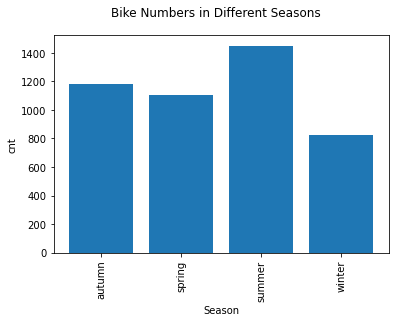

In [7]:
#Season Consideration
df_season = df
df_season['season'] = df['season'].map({0:'spring', 1:'summer', 2:'autumn', 3:'winter'})
df_season = df_season.groupby('season').mean()

plt.figure()
plt.bar(df_season.index, df_season['cnt'])
plt.xlabel("Season")
plt.ylabel("cnt")
plt.suptitle ("Bike Numbers in Different Seasons")
plt.xticks (rotation = 90)
plt.show()

The number of shared bike is used the most in Summer and the least in Winter.

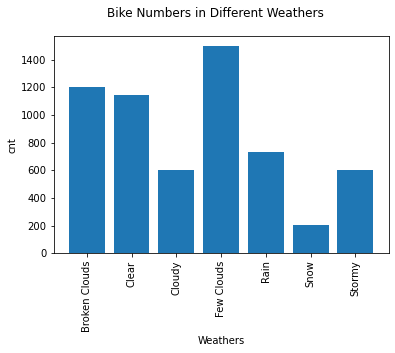

In [8]:
#Weather Consideration
df_weather = df
df_weather['weather'] = df['weather_code'].map({1:'Clear', 2:'Few Clouds', 3:'Broken Clouds', 4:'Cloudy', 7:'Rain', 10:'Stormy', 26: 'Snow', 94:'Freezing Fog'})
df_weather = df_weather.drop(['weather_code'], axis =1)

df_weather = df_weather.groupby('weather').mean()

plt.figure()
plt.bar(df_weather.index, df_weather['cnt'])
plt.xlabel("Weathers")
plt.ylabel("cnt")
plt.suptitle ("Bike Numbers in Different Weathers")
plt.xticks (rotation = 90)
plt.show()

The number of shared bike is used the most in Few Clouds weather and the least in Snow weather.

In [9]:
#Time Consideration
df_time = df
df_time['timestamp'] = pd.to_datetime(df['timestamp'])

df_time['hour'] = df['timestamp'].dt.hour
df_time['month'] = df['timestamp'].dt.month
df_time['day'] = df['timestamp'].dt.day
df_time['weekday'] = df['timestamp'].dt.dayofweek

df_time = df_time.set_index('timestamp')

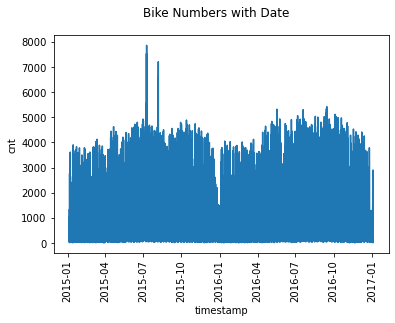

In [10]:
#Each Day
plt.figure()
sns.lineplot (data = df_time, x = df_time.index, y = df_time.cnt)
plt.suptitle ("Bike Numbers with Date")
plt.xticks(rotation = 90)
plt.show()

This is an overall view of all number shared bike in each recorded day.

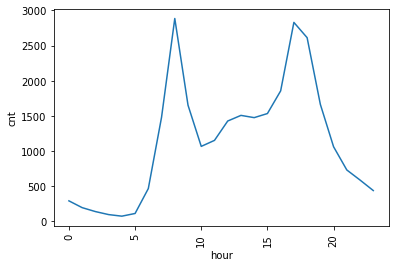

In [11]:
#By hour
df_by_hour = df_time.groupby('hour').mean()

plt.figure()
sns.lineplot(data = df_by_hour, x = df_by_hour.index, y = df_by_hour.cnt)
plt.xticks(rotation = 90)
plt.show()

During a day, the shared bikes are used significantly at around 8 o'clock and 18 o'clock, which are commuter time.

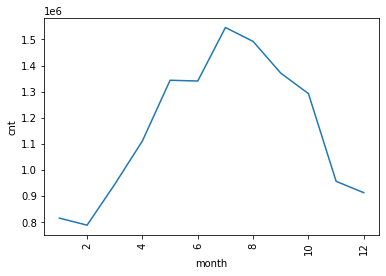

In [12]:
#By month
df_by_month = df_time.groupby('month').sum()

plt.figure()
sns.lineplot(data = df_by_month, x = df_by_month.index, y = df_by_month.cnt)
plt.xticks(rotation = 90)
plt.show()

The shared bikes are used a lot on around July.

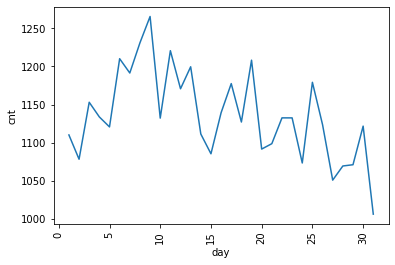

In [13]:
#By day
df_by_day = df_time.groupby('day').mean()

plt.figure()
sns.lineplot(data = df_by_day, x = df_by_day.index, y = df_by_day.cnt)
plt.xticks(rotation = 90)
plt.show()

During a month, people tend to use shared bike in the early month.

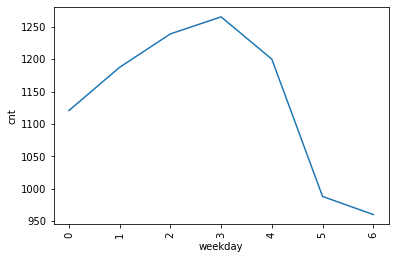

In [14]:
#By week
df_by_week = df_time.groupby('weekday').mean()

plt.figure()
sns.lineplot(data = df_by_week, x = df_by_week.index, y = df_by_week.cnt)
plt.xticks(rotation = 90)
plt.show()

During a week, people tend to use shared bike in the middle week.

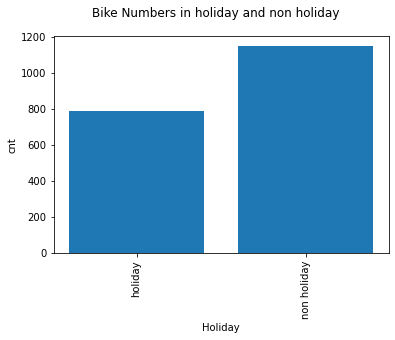

In [15]:
# Holiday and Nonholiday
df_holiday = df
df_holiday['holiday'] = df['is_holiday'].map({0:'non holiday', 1:'holiday'})
df_holiday = df_holiday.groupby('holiday').mean()

plt.figure()
plt.bar(df_holiday.index, df_holiday['cnt'])
plt.xlabel("Holiday")
plt.ylabel("cnt")
plt.suptitle ("Bike Numbers in holiday and non holiday")
plt.xticks (rotation = 90)
plt.show()

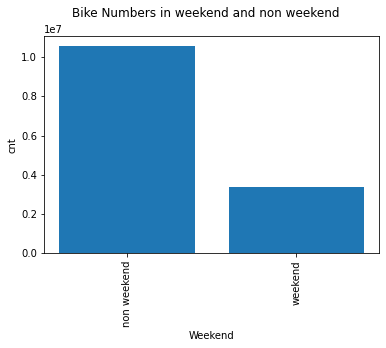

In [16]:
#Weekend and Nonweekend
df_weekend = df
df_weekend['weekend'] = df['is_weekend'].map({0:'non weekend', 1:'weekend'})
df_weekend = df_weekend.groupby('weekend').sum()

plt.figure()
plt.bar(df_weekend.index, df_weekend['cnt'])
plt.xlabel("Weekend")
plt.ylabel("cnt")
plt.suptitle ("Bike Numbers in weekend and non weekend")
plt.xticks (rotation = 90)
plt.show()

# Correlation Matrix

In [17]:
df.corr()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,hour,month,day,weekday
cnt,1.000000,0.384216,0.364773,-0.457498,0.115649,-0.163148,-0.047484,-0.095288,0.323702,0.068372,-0.023115,-0.060405
t1,0.384216,1.000000,0.988304,-0.439397,0.139719,-0.095786,-0.042734,0.000813,0.163153,0.335800,0.009845,0.005150
t2,0.364773,0.988304,1.000000,-0.394916,0.083620,-0.097374,-0.039432,-0.002232,0.148927,0.372430,0.012717,0.000994
hum,-0.457498,-0.439397,-0.394916,1.000000,-0.284379,0.337402,0.024447,0.031429,-0.294206,0.114620,-0.021074,0.013444
wind_speed,0.115649,0.139719,0.083620,-0.284379,1.000000,0.132470,-0.005586,0.007030,0.149300,-0.087449,0.007142,-0.002053
weather_code,-0.163148,-0.095786,-0.097374,0.337402,0.132470,1.000000,0.004731,0.041136,-0.037803,-0.025500,-0.004153,0.018555
is_holiday,-0.047484,-0.042734,-0.039432,0.024447,-0.005586,0.004731,1.000000,-0.091683,0.004978,-0.001434,0.043926,-0.144188
is_weekend,-0.095288,0.000813,-0.002232,0.031429,0.007030,0.041136,-0.091683,1.000000,-0.007397,-0.007778,0.013172,0.790101
hour,0.323702,0.163153,0.148927,-0.294206,0.149300,-0.037803,0.004978,-0.007397,1.000000,-0.004498,-0.006834,-0.001784
month,0.068372,0.335800,0.372430,0.114620,-0.087449,-0.025500,-0.001434,-0.007778,-0.004498,1.000000,0.015299,0.001266


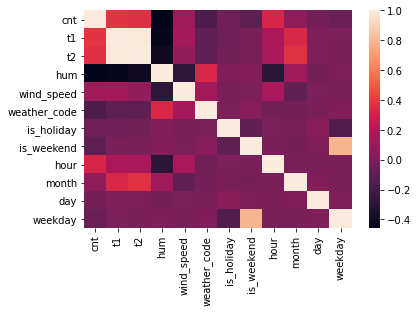

In [18]:
sns.heatmap(df.corr())

Focusing on the t1, t2, humidity, and wind speed, since they are meaningful number in the data, humidity has the grestest coorelation with the number of shared bike, even though they are negative correlation. In addition, according to heatmap above, t1 and t2 are hightly correlated with each other. 

# 3. Conclusion

In a word, all these varibales have more or less correlation with the number of shared bikes. Humidity has the grestest negative coorelation with the number of shared bikes. Futhermore, regarding to the time and environment impact, people tend to use bikes in summer and sunny day.